# Introduction to Optimal Transport with Python

#### *Rémi Flamary, Nicolas Courty*

## POT installation

+ Install with pip:
```bash
pip install pot
```
+ Install with conda
```bash
conda install -c conda-forge pot
```

## POT Python Optimal Transport Toolbox

#### Import the toolbox

In [53]:
import numpy as np # always need it
import scipy as sp # often use it
import pylab as pl # do the plots

import ot # ot 

#### Getting help

Online  documentation : [http://pot.readthedocs.io](http://pot.readthedocs.io) 

Or inline help:


In [54]:
help(ot.dist)

Help on function dist in module ot.utils:

dist(x1, x2=None, metric='sqeuclidean')
    Compute distance between samples in x1 and x2 using function scipy.spatial.distance.cdist
    
    Parameters
    ----------
    
    x1 : ndarray, shape (n1,d)
        matrix with n1 samples of size d
    x2 : array, shape (n2,d), optional
        matrix with n2 samples of size d (if None then x2=x1)
    metric : str | callable, optional
        Name of the metric to be computed (full list in the doc of scipy),  If a string,
        the distance function can be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski',
        'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
        'sokalmichener', 'sokalsneath', 'sqeuclidean', 'wminkowski', 'yule'.
    
    
    Returns
    -------
    
    M : np.array (n1,n2)
        distance matrix computed with given metric



## First OT Problem

We will solve the Bakery/Cafés problem of transporting croissants from a number of Bakeries to Cafés in a City (In this case Manhattan). We did a quick google map search in Manhattan for bakeries and Cafés:

![bak.png](https://remi.flamary.com/cours/otml/bak.png)

We extracted from this search their positions and generated fictional production and sale number (that both sum to the same value).

We have acess to the position of Bakeries ```bakery_pos``` and their respective production ```bakery_prod``` which describe the source distribution. The Cafés where the croissants are sold are defiend also by their position ```cafe_pos``` and ```cafe_prod```. For fun we also provide a map ```Imap``` that will illustrate the position of these shops in the city.


Now we load the data



In [55]:
data=np.load('data/manhattan.npz')

bakery_pos=data['bakery_pos']
bakery_prod=data['bakery_prod']
cafe_pos=data['cafe_pos']
cafe_prod=data['cafe_prod']
Imap=data['Imap']

print('Bakery production: {}'.format(bakery_prod))
print('Cafe sale: {}'.format(cafe_prod))
print('Total croissants : {}'.format(cafe_prod.sum()))

Bakery production: [31. 48. 82. 30. 40. 48. 89. 73.]
Cafe sale: [82. 88. 92. 88. 91.]
Total croissants : 441.0


#### Plotting bakeries in the city

Next we plot the position of the bakeries and cafés on the map. The size of the circle is proportional to their production.


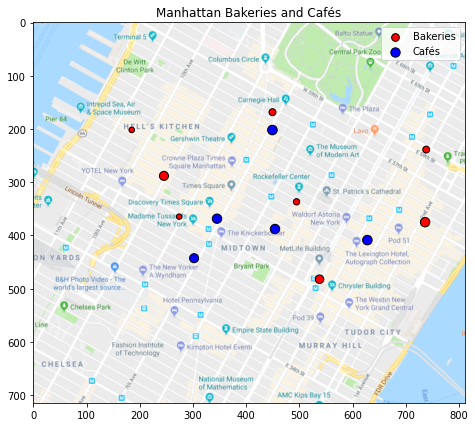

In [56]:

pl.figure(1,(8,7))
pl.clf()
pl.imshow(Imap,interpolation='bilinear') # plot the map
pl.scatter(bakery_pos[:,0],bakery_pos[:,1],s=bakery_prod,c='r', edgecolors='k',label='Bakeries')
pl.scatter(cafe_pos[:,0],cafe_pos[:,1],s=cafe_prod,c='b', edgecolors='k',label='Cafés')
pl.legend()
pl.title('Manhattan Bakeries and Cafés');


#### Cost matrix


We compute the cost matrix between the bakeries and the cafés, this will be the transport cost matrix. This can be done using the [ot.dist](http://pot.readthedocs.io/en/stable/all.html#ot.dist) that defaults to squared euclidean distance but can return other things such as cityblock (or manhattan distance). 



In [65]:
c = ot.dist(bakery_pos,cafe_pos, metric="cityblock")
c

array([[358.1894393 , 326.95645073, 264.4904736 , 455.35873707,
        649.69733261],
       [421.64305156, 304.34582782,  33.6599269 , 224.28322576,
        418.62182129],
       [211.33120771, 180.09821915, 289.98499106, 308.50050548,
        502.83910102],
       [106.2336107 ,  75.00062213, 338.00972082, 203.40290847,
        397.741504  ],
       [298.44917956, 181.15195583, 180.26028463,  91.6173886 ,
        204.94657438],
       [640.1903725 , 522.89314877, 325.72649506, 433.35858154,
        280.66397076],
       [501.68426783, 397.59055914, 460.05653628, 294.85247686,
        142.15786609],
       [275.18018508, 306.41317365, 368.87915079, 178.01088732,
        163.39077689]])

#### Solving the OT problem with [ot.emd](http://pot.readthedocs.io/en/stable/all.html#ot.emd)

In [66]:
ot_emd = ot.emd(bakery_prod, cafe_prod, c)
ot_emd

array([[31.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 48.,  0.,  0.],
       [24., 58.,  0.,  0.,  0.],
       [ 0., 30.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 40.,  0.],
       [ 0.,  0., 44.,  2.,  2.],
       [ 0.,  0.,  0.,  0., 89.],
       [27.,  0.,  0., 46.,  0.]])

#### Transportation plan vizualization

A good vizualization of the OT matrix in the 2D plane is to denote the transportation of mass between a Bakery and a Café by a line. This can easily be done with a double ```for``` loop.

In order to make it more interpretable one can also use the ```alpha``` parameter of plot and set it to ```alpha=G[i,j]/G[i,j].max()```. 

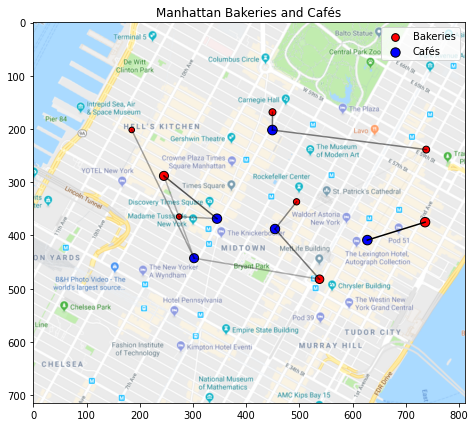

In [67]:
pl.figure(2,(8,7))
pl.clf()
pl.imshow(Imap,interpolation='bilinear') # plot the map
pl.scatter(bakery_pos[:,0],bakery_pos[:,1],s=bakery_prod,c='r', edgecolors='k',label='Bakeries')
pl.scatter(cafe_pos[:,0],cafe_pos[:,1],s=cafe_prod,c='b', edgecolors='k',label='Cafés')
for i in range(ot_emd.shape[0]) :
    for j in range(ot_emd.shape[1]) :
        x = [bakery_pos[i,0],cafe_pos[j,0]]
        y = [bakery_pos[i,1],cafe_pos[j,1]]
        pl.plot(x, y, color = "black", alpha = ot_emd[i,j]/ot_emd.max())
pl.legend()
pl.title('Manhattan Bakeries and Cafés');

#### OT loss and dual variables

The resulting wasserstein loss loss is of the form:

$W=\sum_{i,j}\gamma_{i,j}C_{i,j}$

where $\gamma$ is the optimal transport matrix.


In [71]:
w = sum(sum(ot_emd * c))
w

78182.33579594061

#### Regularized OT with SInkhorn

The Sinkhorn algorithm is very simple to code. You can implement it directly using the following pseudo-code:

![sinkhorn.png](http://remi.flamary.com/cours/otml/sink.png)

An alternative is to use the POT toolbox with [ot.sinkhorn](http://pot.readthedocs.io/en/stable/all.html#ot.sinkhorn)

Be carefull to numerical problems. A good pre-processing for Sinkhorn is to divide the cost matrix ```C```
 by its maximum value.

In [138]:
def sinkhorn(mu_s, mu_t, reg, M, n_iter = int(1e5)) :
    mu_s = np.array([mu_s]).T
    mu_t = np.array([mu_t]).T
    u = np.array([1])
    K = np.exp(-c/reg)
    for i in range(n_iter) :
        v = mu_t / K.T * u.T # update right scaling
        u = mu_s / K * v.T # update left scaling
    return np.diag(u).dot(K.T).dot(np.diag(v))

sinkhorn(bakery_prod, cafe_prod, reg=0.1, M=c / c.max())



<ipython-input-138-9f92ffc361c0>:7: RuntimeWarning: divide by zero encountered in true_divide
  v = mu_t / K.T * u.T # update right scaling
<ipython-input-138-9f92ffc361c0>:8: RuntimeWarning: divide by zero encountered in true_divide
  u = mu_s / K * v.T # update left scaling
<ipython-input-138-9f92ffc361c0>:7: RuntimeWarning: overflow encountered in multiply
  v = mu_t / K.T * u.T # update right scaling


ValueError: shapes (8,) and (5,) not aligned: 8 (dim 0) != 5 (dim 0)

In [142]:
sink = ot.sinkhorn(bakery_prod, cafe_prod, reg=0.1, M=c / c.max())
print(sink.round(1))

[[ 8.5  9.  12.8  0.8  0. ]
 [ 0.3  1.2 43.7  2.7  0. ]
 [36.4 38.4  3.9  3.3  0.1]
 [13.9 14.7  0.1  1.3  0. ]
 [ 2.3  9.   5.  22.5  1.2]
 [ 0.5  2.1 23.7  5.2 16.5]
 [ 1.9  6.2  1.3 19.  60.5]
 [18.2  7.4  1.5 33.3 12.6]]
